## Make classification for Qf and d on validation data

In [1]:
import utils.makeDataset as DatasetMaker
from utils.jpegSettingsClassifier import JpegSettingsClassifier
from sklearn.metrics import classification_report
from utils.training import show_confusion_matrix
import numpy as np
from matplotlib import pyplot as plt

jpegSettingsClassifier = JpegSettingsClassifier()

### Load data and ground truth

In [2]:
ground_truth, X_validation = DatasetMaker.load_dataset("validation")

### Get y_true for Qf and predict Qf for X_validation

In [3]:
y_true_q = jpegSettingsClassifier.get_y_true_q(ground_truth)
y_pred_q = jpegSettingsClassifier.predict_q(X_validation)


### Get y_true for d and predict d for X_validation

In [4]:
y_true_d = jpegSettingsClassifier.get_y_true_d(ground_truth)
y_pred_d = jpegSettingsClassifier.predict_d(X_validation, jpegSettingsClassifier.get_y_q_labels(y_pred_q))

### Compute some metrics

In [5]:
y_true_multiclass = jpegSettingsClassifier.get_y_multiclass(y_true_q, y_true_d)
y_pred_multiclass = jpegSettingsClassifier.get_y_multiclass(y_pred_q, y_pred_d)
print(f"Well predicted Qf : {jpegSettingsClassifier.get_well_predicted_Q(y_true_multiclass, y_pred_multiclass)}%")
print(f"Well predicted d : {jpegSettingsClassifier.get_well_predicted_d(y_true_multiclass, y_pred_multiclass)}%")
print(f"Well predicted Qf and d : {jpegSettingsClassifier.get_well_predicted_Q_and_d(y_true_multiclass, y_pred_multiclass)}%")

Well predicted Qf : 0.8870967741935484%
Well predicted d : 0.8763440860215054%
Well predicted Qf and d : 0.8333333333333334%


In [6]:
y_true_multiclass_labels = jpegSettingsClassifier.get_y_multiclass(jpegSettingsClassifier.get_y_q_labels(y_true_q), jpegSettingsClassifier.get_y_d_labels(y_true_d))
y_pred_multiclass_labels = jpegSettingsClassifier.get_y_multiclass(jpegSettingsClassifier.get_y_q_labels(y_pred_q), jpegSettingsClassifier.get_y_d_labels(y_pred_d))

In [7]:
classes = ["Q1_d1", "Q1_d2", "Q1_d3", "Q2_d1", "Q2_d2", "Q2_d3", "Q3_d1", "Q3_d2", "Q3_d3"]
y_true_single_label = jpegSettingsClassifier.convert_multi_label_to_single(y_true_multiclass)
y_pred_single_label = jpegSettingsClassifier.convert_multi_label_to_single(y_pred_multiclass)

              precision    recall  f1-score   support

       Q1_d1       0.78      0.78      0.78        27
       Q1_d2       0.77      0.79      0.78        29
       Q1_d3       0.82      0.82      0.82        17
       Q2_d1       0.77      0.74      0.76        23
       Q2_d2       1.00      1.00      1.00        14
       Q2_d3       0.82      0.82      0.82        22
       Q3_d1       0.91      0.91      0.91        23
       Q3_d2       0.91      0.87      0.89        23
       Q3_d3       0.78      0.88      0.82         8

    accuracy                           0.83       186
   macro avg       0.84      0.85      0.84       186
weighted avg       0.83      0.83      0.83       186



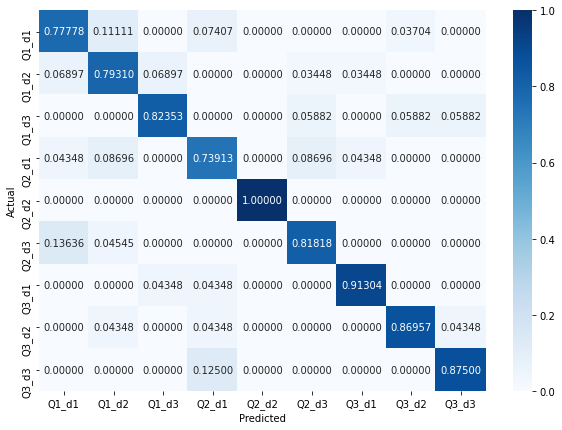

In [8]:
print(classification_report(y_true_single_label, y_pred_single_label, target_names=classes))
plt.figure(figsize=(10,7))
show_confusion_matrix(y_true_single_label, y_pred_single_label, classes, "", False)
plt.show()

